In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algorythms import max_naive

# Función de suma de gaussianas
def f(x, points, sigma=0.1):
    """
    Calcula la suma de gaussianas en 2 dimensiones con centros generados aleatoriamente.
    
    :param x: Vector 2D donde se evaluará la función, por ejemplo, [x1, x2]
    :param sigma: Valor del parámetro σ (sigma)
    :return: Valor de la función en el punto `x`
    """
    return -sum(np.exp(-np.linalg.norm(x - p)**2 / (2 * sigma**2)) for p in points)



In [2]:

# Gradiente de la "suma de gaussianas"
def df(x, points, sigma=0.1):
    """
    Calcula el gradiente de la suma de gaussianas en 2D.
    :param x: Vector 2D donde se evaluará la función, por ejemplo, [x1, x2]
    :param sigma: Valor del parámetro σ (sigma)
    :return: Gradiente como un vector [df/dx1, df/dx2]
    """
    grad = np.zeros_like(x, dtype=np.float64)
    for p in points:
        diff = x - p
        grad += (diff / sigma**2) * np.exp(-np.linalg.norm(diff)**2 / (2 * sigma**2))
    return grad


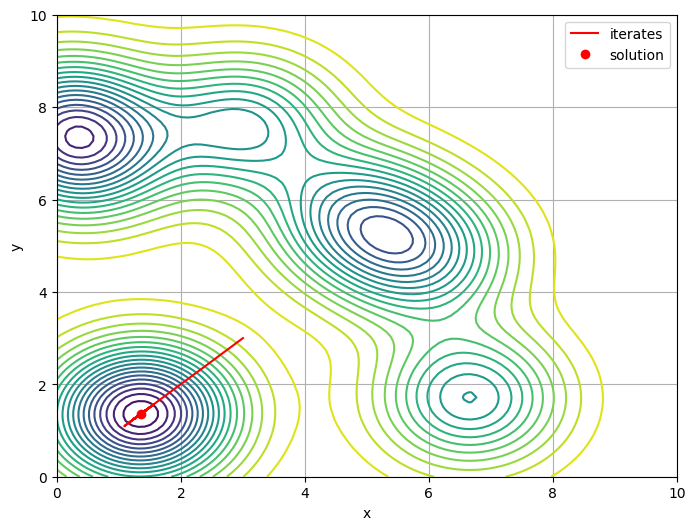

In [3]:

# Generar puntos aleatorios
def random_points(k, rango_x, rango_y):
    np.random.seed(42)  # Fijar la semilla para reproducibilidad
    return [np.array([np.random.uniform(rango_x[0], rango_x[1]), np.random.uniform(rango_y[0], rango_y[1])]) for _ in range(k)]

# Función para crear el gráfico de contornos y las trayectorias
def create_contour_and_path(f, xk_list, points, sigma, x_best):
    # Generar el gráfico de contornos de la función
    plt.figure(figsize=(8, 6))

    # Crear una malla de puntos para graficar la función
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([f(np.array([xi, yi])) for xi, yi in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

    # Graficar los contornos de la función
    plt.contour(X, Y, Z, levels=20, cmap='viridis')
    
    # Graficar la trayectoria del método de optimización
    x_points = [p[0] for p in xk_list]
    y_points = [p[1] for p in xk_list]
    plt.plot(x_points, y_points, '-r', label='iterates')
    
    # Resaltar el punto final (solución encontrada)
    plt.plot(x_best[0], x_best[1], 'ro', label='solution')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Definir los parámetros
k = 8
rango_x = [0, k]
rango_y = [0, k]

# Generar los puntos aleatorios para las gaussianas
points = random_points(k, rango_x, rango_y)

# Punto inicial y otros parámetros
x0 = np.array([3, 3])
sigma = 1.0
maxIter = 100
tol = 1e-6

x_best, xk_list, fxk_list, error_list, num_iters, converged = max_naive(f=lambda x: f(x, points, sigma),
                                                                                 df=lambda x: df(x, points, sigma),
                                                                                    x0=x0, alpha=0.1, max_iter=maxIter, epsilon=tol)

create_contour_and_path(lambda x: f(x, points, sigma), xk_list, points, sigma, x_best)